In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('results_yaml.csv')
df.head()

,filename,time,Type,valve,mass 1,mass 2,mass 3,mass 4,mass 5,pressure 1,...,L4,L5,Lavg,Lstdev,L_cv_abs,pass/fail,lowerbound,upperbound,ci_cf,p-value
0,unit0.yaml,2020-09-30T21:25:59.925859Z,35,1,0.158301,0.145190,0.146059,0.145640,0.147566,5.679790,...,0.032721,0.032294,0.032115,0.001018,3.170877,False,0.026928,0.037302,0.044019,0.293379
1,unit0.yaml,2020-09-30T21:25:59.925859Z,35,2,0.204998,0.200368,0.202618,0.201858,0.201817,5.679790,...,0.023603,0.023608,0.023553,0.000175,0.744217,True,0.022660,0.024446,0.010331,0.473641
2,unit0.yaml,2020-09-30T21:25:59.925859Z,35,3,0.243597,0.246144,0.248064,0.247385,0.247034,5.675212,...,0.019254,0.019281,0.019331,0.000124,0.642116,True,0.018699,0.019963,0.008914,0.143681
3,unit0.yaml,2020-09-30T21:25:59.925859Z,35,4,0.146465,0.152078,0.150404,0.152122,0.148231,5.674067,...,0.031317,0.032133,0.031796,0.000472,1.483195,True,0.029394,0.034198,0.020590,0.698497
4,unit0.yaml,2020-09-30T21:25:59.925859Z,35,5,0.196050,0.189909,0.189834,0.190011,0.189350,5.674067,...,0.025067,0.025155,0.024940,0.000321,1.288022,True,0.023304,0.026576,0.017881,0.148921


In [3]:
df.dtypes

filename       object
time           object
Type            int64
valve           int64
mass 1        float64
mass 2        float64
mass 3        float64
mass 4        float64
mass 5        float64
pressure 1    float64
pressure 2    float64
pressure 3    float64
pressure 4    float64
pressure 5    float64
L1            float64
L2            float64
L3            float64
L4            float64
L5            float64
Lavg          float64
Lstdev        float64
L_cv_abs      float64
pass/fail        bool
lowerbound    float64
upperbound    float64
ci_cf         float64
p-value       float64
dtype: object

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df.dtypes

filename                   object
time          datetime64[ns, UTC]
Type                        int64
valve                       int64
mass 1                    float64
mass 2                    float64
mass 3                    float64
mass 4                    float64
mass 5                    float64
pressure 1                float64
pressure 2                float64
pressure 3                float64
pressure 4                float64
pressure 5                float64
L1                        float64
L2                        float64
L3                        float64
L4                        float64
L5                        float64
Lavg                      float64
Lstdev                    float64
L_cv_abs                  float64
pass/fail                    bool
lowerbound                float64
upperbound                float64
ci_cf                     float64
p-value                   float64
dtype: object

In [6]:
df['normal_time']=df['time'].map(dt.datetime.toordinal)


In [7]:
min_time = df.loc[df['normal_time'] == df['normal_time'].min()]['normal_time'].iloc[0]
min_time

737641

In [8]:
df['normal_time'] = df['normal_time'] - min_time

In [9]:
df.head()

,filename,time,Type,valve,mass 1,mass 2,mass 3,mass 4,mass 5,pressure 1,...,L5,Lavg,Lstdev,L_cv_abs,pass/fail,lowerbound,upperbound,ci_cf,p-value,normal_time
0,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,1,0.158301,0.145190,0.146059,0.145640,0.147566,5.679790,...,0.032294,0.032115,0.001018,3.170877,False,0.026928,0.037302,0.044019,0.293379,57
1,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,2,0.204998,0.200368,0.202618,0.201858,0.201817,5.679790,...,0.023608,0.023553,0.000175,0.744217,True,0.022660,0.024446,0.010331,0.473641,57
2,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,3,0.243597,0.246144,0.248064,0.247385,0.247034,5.675212,...,0.019281,0.019331,0.000124,0.642116,True,0.018699,0.019963,0.008914,0.143681,57
3,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,4,0.146465,0.152078,0.150404,0.152122,0.148231,5.674067,...,0.032133,0.031796,0.000472,1.483195,True,0.029394,0.034198,0.020590,0.698497,57
4,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,5,0.196050,0.189909,0.189834,0.190011,0.189350,5.674067,...,0.025155,0.024940,0.000321,1.288022,True,0.023304,0.026576,0.017881,0.148921,57


In [10]:
dummies = pd.get_dummies(df['Type'], drop_first=True)
dummies

""
0
1
2
3
4
...
435
436
437
438


In [11]:
df = pd.concat([df, dummies], axis=1)
df.head()

,filename,time,Type,valve,mass 1,mass 2,mass 3,mass 4,mass 5,pressure 1,...,L5,Lavg,Lstdev,L_cv_abs,pass/fail,lowerbound,upperbound,ci_cf,p-value,normal_time
0,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,1,0.158301,0.145190,0.146059,0.145640,0.147566,5.679790,...,0.032294,0.032115,0.001018,3.170877,False,0.026928,0.037302,0.044019,0.293379,57
1,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,2,0.204998,0.200368,0.202618,0.201858,0.201817,5.679790,...,0.023608,0.023553,0.000175,0.744217,True,0.022660,0.024446,0.010331,0.473641,57
2,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,3,0.243597,0.246144,0.248064,0.247385,0.247034,5.675212,...,0.019281,0.019331,0.000124,0.642116,True,0.018699,0.019963,0.008914,0.143681,57
3,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,4,0.146465,0.152078,0.150404,0.152122,0.148231,5.674067,...,0.032133,0.031796,0.000472,1.483195,True,0.029394,0.034198,0.020590,0.698497,57
4,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,5,0.196050,0.189909,0.189834,0.190011,0.189350,5.674067,...,0.025155,0.024940,0.000321,1.288022,True,0.023304,0.026576,0.017881,0.148921,57


In [12]:
df['time_2'] = df['normal_time']**2

In [13]:
# df['time_filter'] = df['normal_time'] * df[35]

KeyError: 35

In [14]:
df.head()

,filename,time,Type,valve,mass 1,mass 2,mass 3,mass 4,mass 5,pressure 1,...,Lavg,Lstdev,L_cv_abs,pass/fail,lowerbound,upperbound,ci_cf,p-value,normal_time,time_2
0,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,1,0.158301,0.145190,0.146059,0.145640,0.147566,5.679790,...,0.032115,0.001018,3.170877,False,0.026928,0.037302,0.044019,0.293379,57,3249
1,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,2,0.204998,0.200368,0.202618,0.201858,0.201817,5.679790,...,0.023553,0.000175,0.744217,True,0.022660,0.024446,0.010331,0.473641,57,3249
2,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,3,0.243597,0.246144,0.248064,0.247385,0.247034,5.675212,...,0.019331,0.000124,0.642116,True,0.018699,0.019963,0.008914,0.143681,57,3249
3,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,4,0.146465,0.152078,0.150404,0.152122,0.148231,5.674067,...,0.031796,0.000472,1.483195,True,0.029394,0.034198,0.020590,0.698497,57,3249
4,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,5,0.196050,0.189909,0.189834,0.190011,0.189350,5.674067,...,0.024940,0.000321,1.288022,True,0.023304,0.026576,0.017881,0.148921,57,3249


In [15]:
df['time_filter'] = df['normal_time']*df['Type']

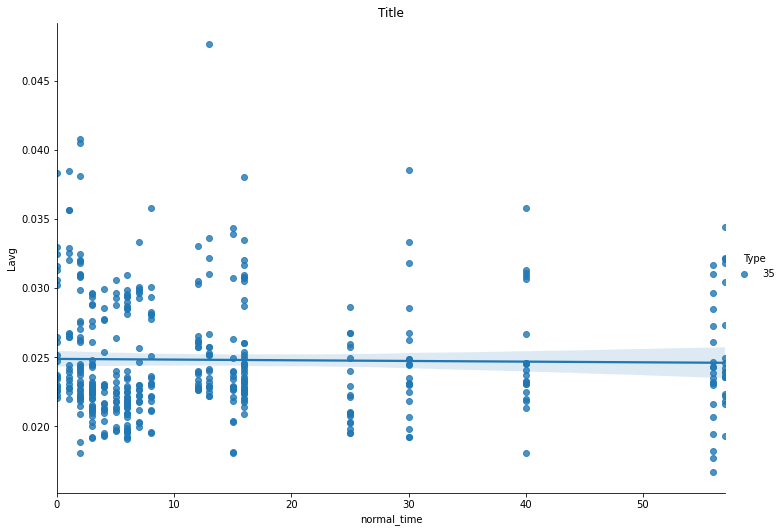

In [16]:
sns.lmplot(y = "Lavg", x= "normal_time", hue = "Type", data = df, height=7.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_title("Title")
plt.show()

In [17]:
index = df.loc[df['Lavg'] == df['Lavg'].max()].index
index

Int64Index([293], dtype='int64')

In [18]:
df = df.drop(index)

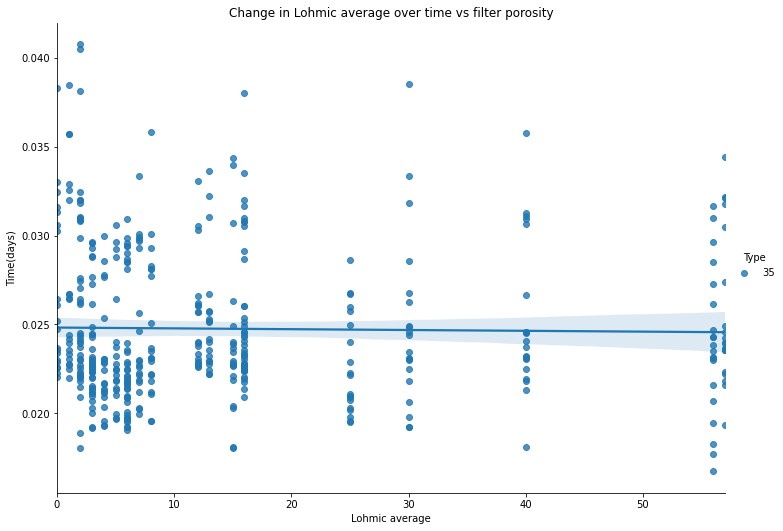

In [19]:
sns.lmplot(y = "Lavg", x= "normal_time", hue = "Type", data = df, height=7.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set(xlabel="Lohmic average", ylabel='Time(days)', title='Change in Lohmic average over time vs filter porosity')
plt.show()

In [20]:
indeces = df.loc[df['valve'] == 15].index
indeces

Int64Index([ 14,  34,  54,  74,  94, 114, 134, 154, 174, 194, 214, 234, 254,
            274, 294, 314, 334, 354, 374, 394, 414, 434],
           dtype='int64')

In [21]:
df_sans15 = df.drop(indeces).copy()
df_sans15.head(20)

,filename,time,Type,valve,mass 1,mass 2,mass 3,mass 4,mass 5,pressure 1,...,Lstdev,L_cv_abs,pass/fail,lowerbound,upperbound,ci_cf,p-value,normal_time,time_2,time_filter
0,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,1,0.158301,0.145190,0.146059,0.145640,0.147566,5.679790,...,0.001018,3.170877,False,0.026928,0.037302,0.044019,0.293379,57,3249,1995
1,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,2,0.204998,0.200368,0.202618,0.201858,0.201817,5.679790,...,0.000175,0.744217,True,0.022660,0.024446,0.010331,0.473641,57,3249,1995
2,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,3,0.243597,0.246144,0.248064,0.247385,0.247034,5.675212,...,0.000124,0.642116,True,0.018699,0.019963,0.008914,0.143681,57,3249,1995
3,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,4,0.146465,0.152078,0.150404,0.152122,0.148231,5.674067,...,0.000472,1.483195,True,0.029394,0.034198,0.020590,0.698497,57,3249,1995
4,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,5,0.196050,0.189909,0.189834,0.190011,0.189350,5.674067,...,0.000321,1.288022,True,0.023304,0.026576,0.017881,0.148921,57,3249,1995
5,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,6,0.221909,0.219338,0.219938,0.219119,0.221002,5.674067,...,0.000102,0.472273,True,0.021105,0.022145,0.006556,0.700167,57,3249,1995
6,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,7,0.216811,0.212354,0.214212,0.215034,0.214294,5.671778,...,0.000147,0.663935,True,0.021448,0.022949,0.009217,0.724282,57,3249,1995
7,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,8,0.224091,0.216047,0.216507,0.217142,0.216555,5.671778,...,0.000295,1.352426,True,0.020336,0.023346,0.018775,0.242522,57,3249,1995
8,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,9,0.202686,0.200688,0.202632,0.202779,0.200555,5.667201,...,0.000120,0.507649,True,0.022974,0.024193,0.007047,0.643403,57,3249,1995
9,unit0.yaml,2020-09-30 21:25:59.925859+00:00,35,10,0.196528,0.199778,0.194264,0.195856,0.194826,5.667201,...,0.000236,0.974736,True,0.023055,0.025464,0.013532,0.355537,57,3249,1995


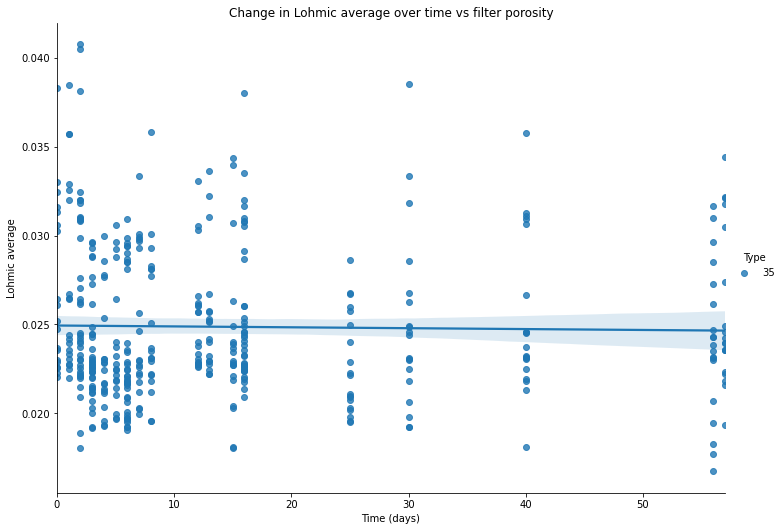

In [22]:
sns.lmplot(y = "Lavg", x= "normal_time", hue = "Type", data = df_sans15, height=7.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set(xlabel="Time (days)", ylabel='Lohmic average', title='Change in Lohmic average over time vs filter porosity')
plt.show()

In [23]:
max_time = df_sans15['normal_time'].max()
max_time
indices = df_sans15.loc[df_sans15['normal_time'] == max_time].index
indices

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19], dtype='int64')

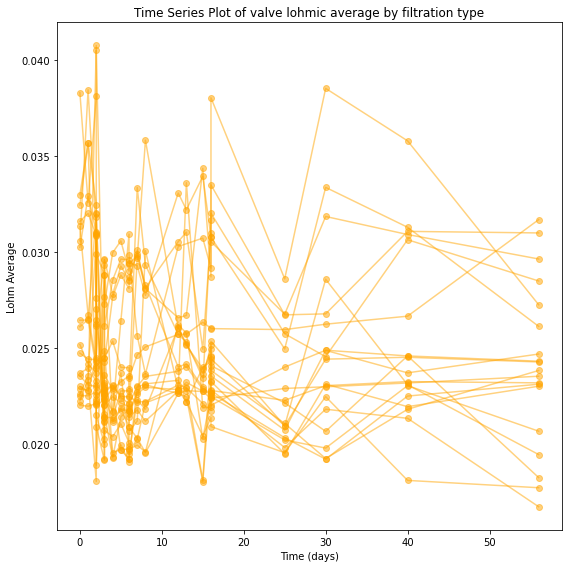

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

df_new = df_sans15.drop(indices)

df_sorted = df_new.sort_values('normal_time').copy()

valves = list(df_sorted['valve'].unique())

color_dict = {12: 'b', 35: 'orange'}

for valve in valves:
    valve_df = df_sorted.loc[df_sorted['valve'] == valve]
    color = color_dict[valve_df['Type'].iloc[0]]
    ax.plot(valve_df['normal_time'], valve_df['Lavg'], color=color, marker='o', alpha=0.5, label=valve)

ax.set(xlabel='Time (days)', ylabel='Lohm Average', title='Time Series Plot of valve lohmic average by filtration type')
# plt.legend()
plt.tight_layout()
plt.show()

In [25]:
df_sorted.head()

,filename,time,Type,valve,mass 1,mass 2,mass 3,mass 4,mass 5,pressure 1,...,Lstdev,L_cv_abs,pass/fail,lowerbound,upperbound,ci_cf,p-value,normal_time,time_2,time_filter
20,unit0_2020-08-04T21_29_53.755062Z.yaml,2020-08-04 21:29:53.755062+00:00,35,1,0.164548,0.147560,0.149524,0.148682,0.147706,5.719844,...,0.001274,4.031685,False,0.025109,0.038086,0.055969,0.184720,0,0,0
39,unit0_2020-08-04T21_29_53.755062Z.yaml,2020-08-04 21:29:53.755062+00:00,35,20,0.212204,0.210952,0.211733,0.213299,0.212862,5.717556,...,0.000091,0.401717,True,0.022068,0.022990,0.005577,0.232182,0,0,0
38,unit0_2020-08-04T21_29_53.755062Z.yaml,2020-08-04 21:29:53.755062+00:00,35,19,0.216545,0.216132,0.217865,0.216511,0.218100,5.714122,...,0.000083,0.377851,True,0.021601,0.022449,0.005245,0.246718,0,0,0
37,unit0_2020-08-04T21_29_53.755062Z.yaml,2020-08-04 21:29:53.755062+00:00,35,18,0.192542,0.192173,0.193609,0.194120,0.193738,5.714122,...,0.000100,0.403006,True,0.024229,0.025244,0.005595,0.091158,0,0,0
36,unit0_2020-08-04T21_29_53.755062Z.yaml,2020-08-04 21:29:53.755062+00:00,35,17,0.195866,0.204548,0.204709,0.204872,0.204599,5.709545,...,0.000422,1.791267,True,0.021406,0.025705,0.024867,0.175837,0,0,0


In [26]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data


In [27]:
df_sorted.columns

Index(['filename', 'time', 'Type', 'valve', 'mass 1', 'mass 2', 'mass 3',
       'mass 4', 'mass 5', 'pressure 1', 'pressure 2', 'pressure 3',
       'pressure 4', 'pressure 5', 'L1', 'L2', 'L3', 'L4', 'L5', 'Lavg',
       'Lstdev', 'L_cv_abs', 'pass/fail', 'lowerbound', 'upperbound', 'ci_cf',
       'p-value', 'normal_time', 'time_2', 'time_filter'],
      dtype='object')

In [28]:
model = smf.ols("Lavg ~ Type + normal_time + I(normal_time^2)", data=df_sorted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Lavg   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.516
Date:                Thu, 01 Oct 2020   Prob (F-statistic):              0.221
Time:                        22:32:09   Log-Likelihood:                 1607.1
No. Observations:                 398   AIC:                            -3208.
Df Residuals:                     395   BIC:                            -3196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.045e-05   2.39

In [32]:
model = smf.ols("Lavg ~ normal_time", data=df_sorted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Lavg   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.100
Date:                Thu, 01 Oct 2020   Prob (F-statistic):              0.295
Time:                        22:33:22   Log-Likelihood:                 1606.1
No. Observations:                 398   AIC:                            -3208.
Df Residuals:                     396   BIC:                            -3200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0250      0.000     85.718      

In [30]:
model = smf.ols("Lavg ~ Type + normal_time + I(normal_time^2):Type", data=df_sorted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Lavg   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.516
Date:                Thu, 01 Oct 2020   Prob (F-statistic):              0.221
Time:                        22:32:09   Log-Likelihood:                 1607.1
No. Observations:                 398   AIC:                            -3208.
Df Residuals:                     395   BIC:                            -3196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

In [33]:
df['normal_time'].unique()

array([57,  0,  1,  2,  3,  4,  5,  6,  7,  8, 12, 13, 15, 16, 25, 30, 40,
       56], dtype=int64)